**Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.preprocessing import  LabelEncoder , OneHotEncoder ,  MinMaxScaler
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,  GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

**EDA**

In [ ]:
df = pd.read_csv('/content/bank.csv')
df2 = df.copy()
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [ ]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


In [ ]:
cat_cols_df = [col for col in df.columns if df[col].dtype == 'object']
num_cols_df = [col for col in df.columns if df[col].dtype != 'object']

cat_cols_df2 = [col for col in df.columns if df[col].dtype == 'object']
num_cols_df2 = [col for col in df.columns if df[col].dtype != 'object']

**Insights**

/tmp/ipython-input-64306652.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x = 'job' , palette='coolwarm')


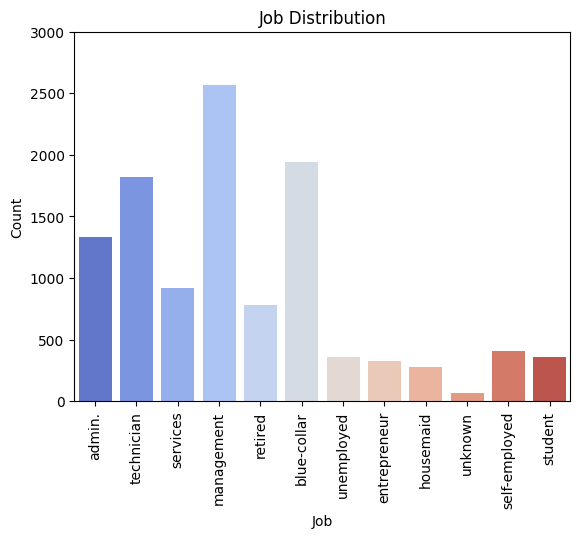

In [ ]:
sns.countplot(data = df , x = 'job' , palette='coolwarm')
plt.title('Job Distribution')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.ylim(0,3000)
plt.show()


/tmp/ipython-input-686842371.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='default', palette='coolwarm', ax=axes[0])
/tmp/ipython-input-686842371.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='housing', palette='coolwarm', ax=axes[1])
/tmp/ipython-input-686842371.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan', palette='coolwarm', ax=axes[2])
/tmp/ipython-input-686842371.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

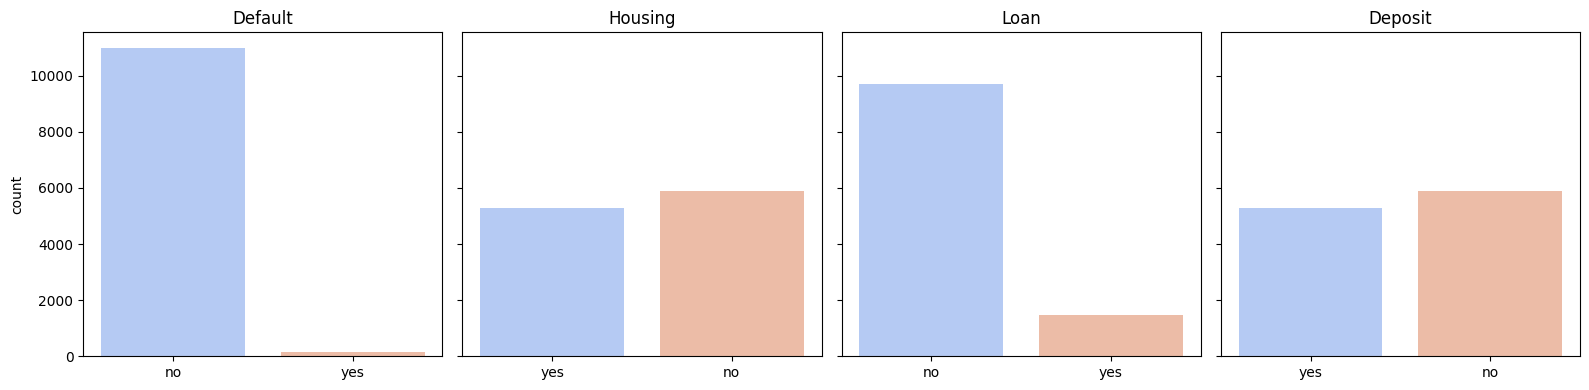

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(16,4), sharey=True)

sns.countplot(data=df, x='default', palette='coolwarm', ax=axes[0])
axes[0].set_title('Default')
axes[0].set_xlabel('')

sns.countplot(data=df, x='housing', palette='coolwarm', ax=axes[1])
axes[1].set_title('Housing')
axes[1].set_xlabel('')

sns.countplot(data=df, x='loan', palette='coolwarm', ax=axes[2])
axes[2].set_title('Loan')
axes[2].set_xlabel('')

sns.countplot(data=df, x='deposit', palette='coolwarm', ax=axes[3])
axes[3].set_title('Deposit')
axes[3].set_xlabel('')

plt.tight_layout()
plt.show()


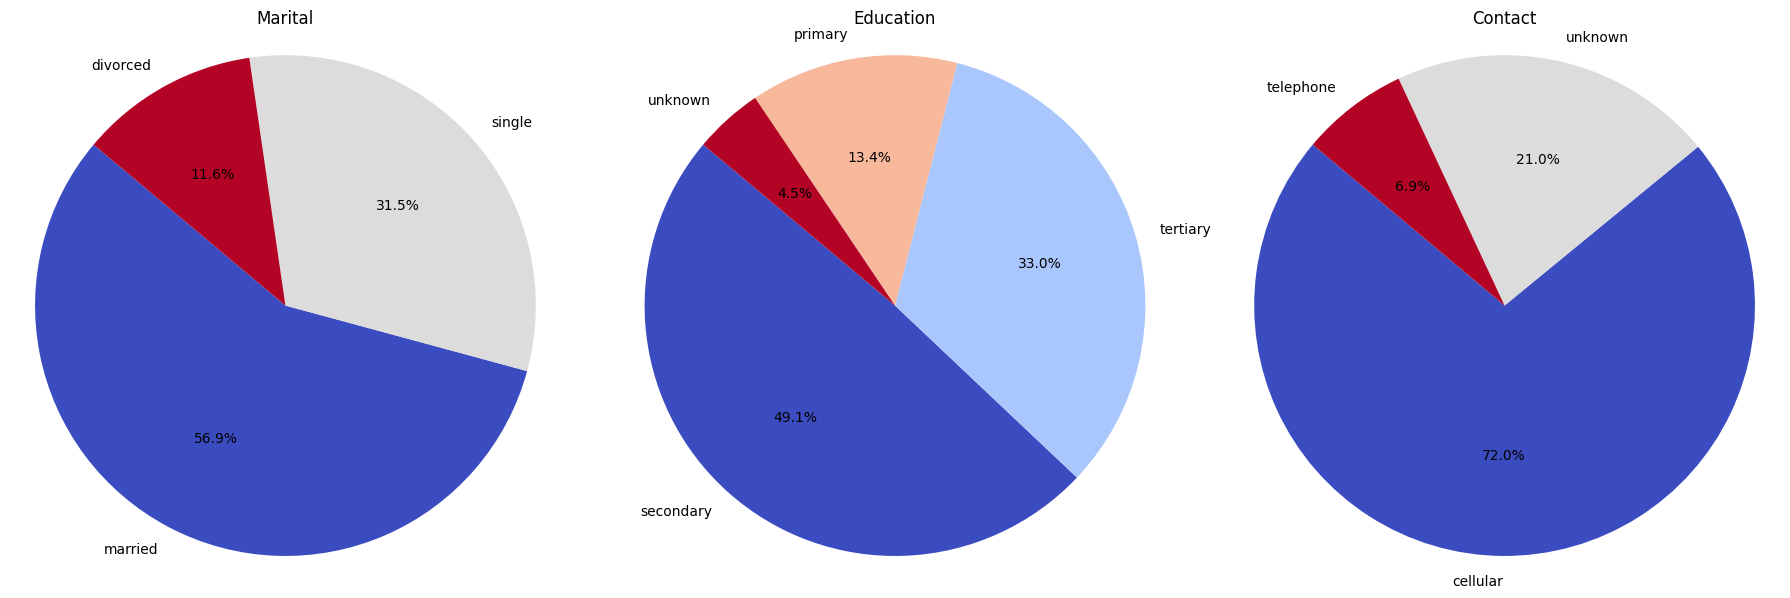

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

cols = ['marital', 'education', 'contact']

for i, col in enumerate(cols):
    counts = df[col].value_counts()

    colors = plt.cm.coolwarm(
        np.linspace(0, 1, len(counts))
    )

    axes[i].pie(
        counts.values,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors
    )

    axes[i].set_title(col.capitalize())
    axes[i].axis('equal')

plt.tight_layout()
plt.show()


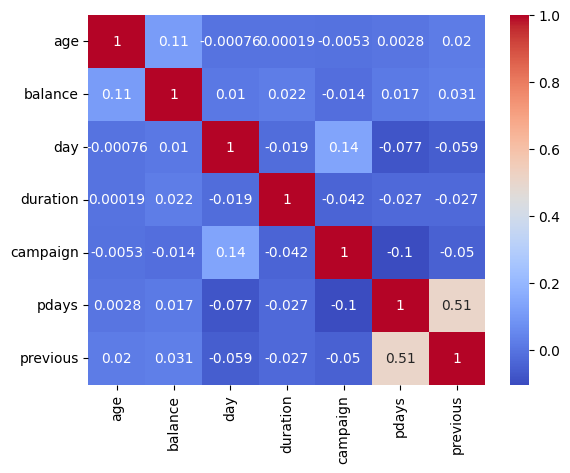

In [ ]:
sns.heatmap(df[num_cols_df].corr(), annot=True, cmap='coolwarm')
plt.show()


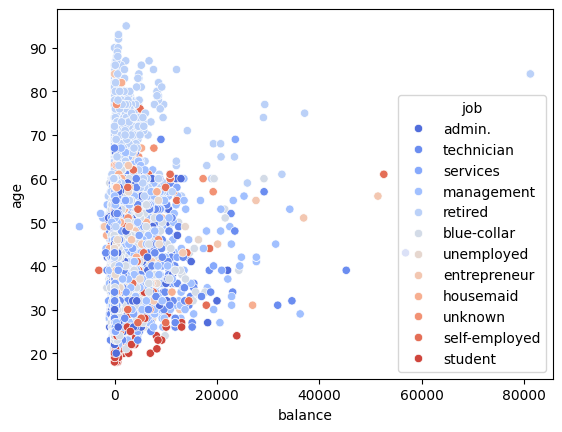

In [ ]:
sns.scatterplot(data=df , x = 'balance' , y = 'age' , hue = 'job' , palette='coolwarm')
plt.show()

/tmp/ipython-input-994803502.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


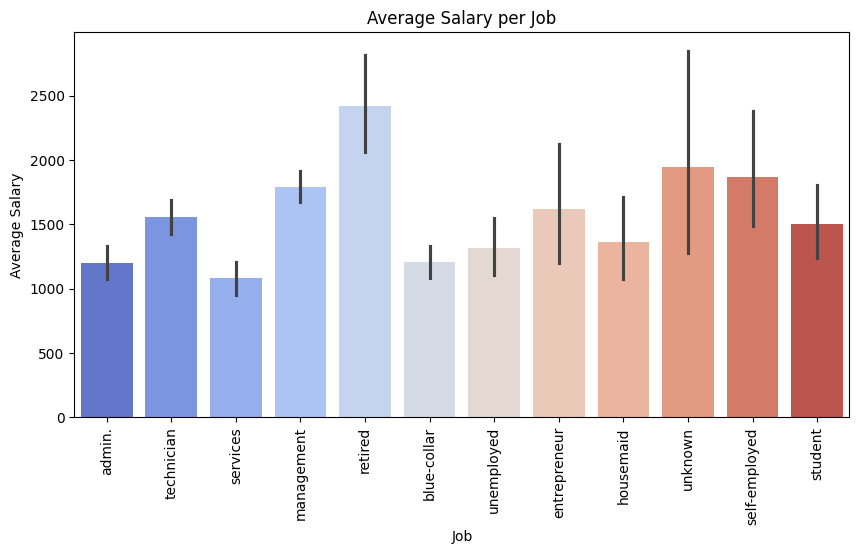

In [ ]:
plt.figure(figsize=(10,5))

sns.barplot(
    data=df,
    x='job',
    y='balance',
    estimator='mean',
    palette='coolwarm'
)

plt.title('Average Salary per Job')
plt.xlabel('Job')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()


/tmp/ipython-input-3015921562.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


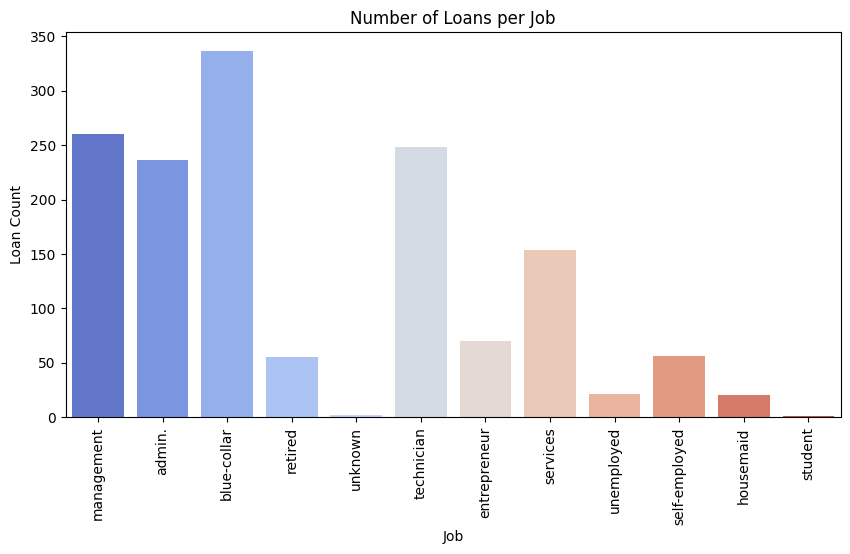

In [ ]:
loan_df = df[df['loan'] == 'yes']

plt.figure(figsize=(10,5))

sns.countplot(
    data=loan_df,
    x='job',
    palette='coolwarm'
)

plt.title('Number of Loans per Job')
plt.xlabel('Job')
plt.ylabel('Loan Count')
plt.xticks(rotation=90)
plt.show()


/tmp/ipython-input-175346302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


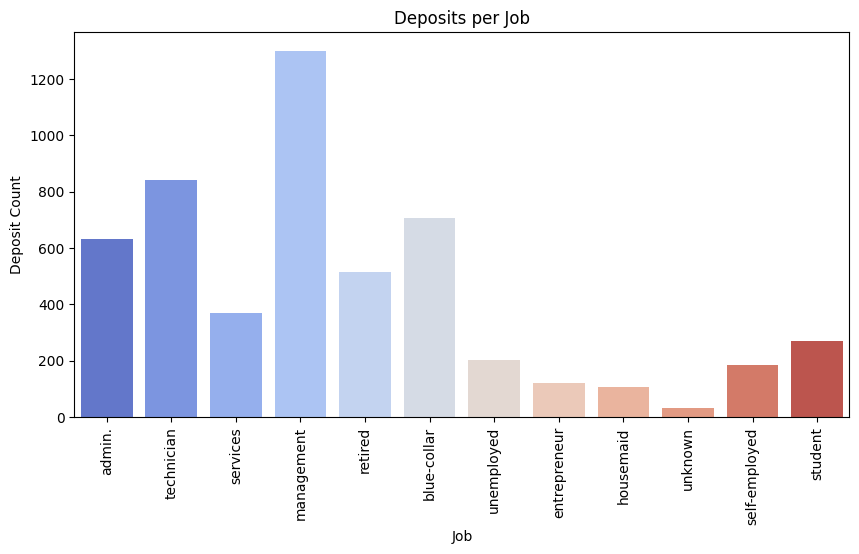

In [ ]:
deposit_df = df[df['deposit'] == 'yes']

plt.figure(figsize=(10,5))

sns.countplot(
    data=deposit_df,
    x='job',
    palette='coolwarm'
)

plt.title('Deposits per Job')
plt.xlabel('Job')
plt.ylabel('Deposit Count')
plt.xticks(rotation=90)
plt.show()


In [ ]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


**Data Notes**


*   Data Cleaning
*   Data Spilitng
*   Data Processing





**Data Cleaning**


1.   Clear (df) From Unkownn Values / Simple Imputer On (df2)
2.   Delete Some Columns
3.   Outliers

**Clear (df) From Unkownn Values**

In [ ]:
df = df[df['job']!='unknown']
df = df[df['education']!='unknown']
df = df[df['contact']!='unknown']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8393 entries, 367 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8393 non-null   int64 
 1   job        8393 non-null   object
 2   marital    8393 non-null   object
 3   education  8393 non-null   object
 4   default    8393 non-null   object
 5   balance    8393 non-null   int64 
 6   housing    8393 non-null   object
 7   loan       8393 non-null   object
 8   contact    8393 non-null   object
 9   day        8393 non-null   int64 
 10  month      8393 non-null   object
 11  duration   8393 non-null   int64 
 12  campaign   8393 non-null   int64 
 13  pdays      8393 non-null   int64 
 14  previous   8393 non-null   int64 
 15  poutcome   8393 non-null   object
 16  deposit    8393 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


**Simple Imputer On (df2)**

In [ ]:
imputer = SimpleImputer( missing_values = 'unknown' , strategy='most_frequent')
df2[cat_cols_df] = imputer.fit_transform(df2[cat_cols_df])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
for col in df2[cat_cols_df]:

  print(f'{col} : {df2[col].unique()}')
  print('-------------------------------------')

job : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'self-employed' 'student']
-------------------------------------
marital : ['married' 'single' 'divorced']
-------------------------------------
education : ['secondary' 'tertiary' 'primary']
-------------------------------------
default : ['no' 'yes']
-------------------------------------
housing : ['yes' 'no']
-------------------------------------
loan : ['no' 'yes']
-------------------------------------
contact : ['cellular' 'telephone']
-------------------------------------
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
-------------------------------------
poutcome : ['failure' 'other' 'success']
-------------------------------------
deposit : ['yes' 'no']
-------------------------------------


**Delete Some Columns**

In [ ]:
df.drop(columns=['poutcome','month'] , axis=1,inplace=True)
df2.drop(columns=['poutcome','month'] , axis=1,inplace=True)

**Outliers**

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

In [ ]:
outlier_cols_df = ['age' , 'balance' , 'duration' , 'pdays' , 'previous']

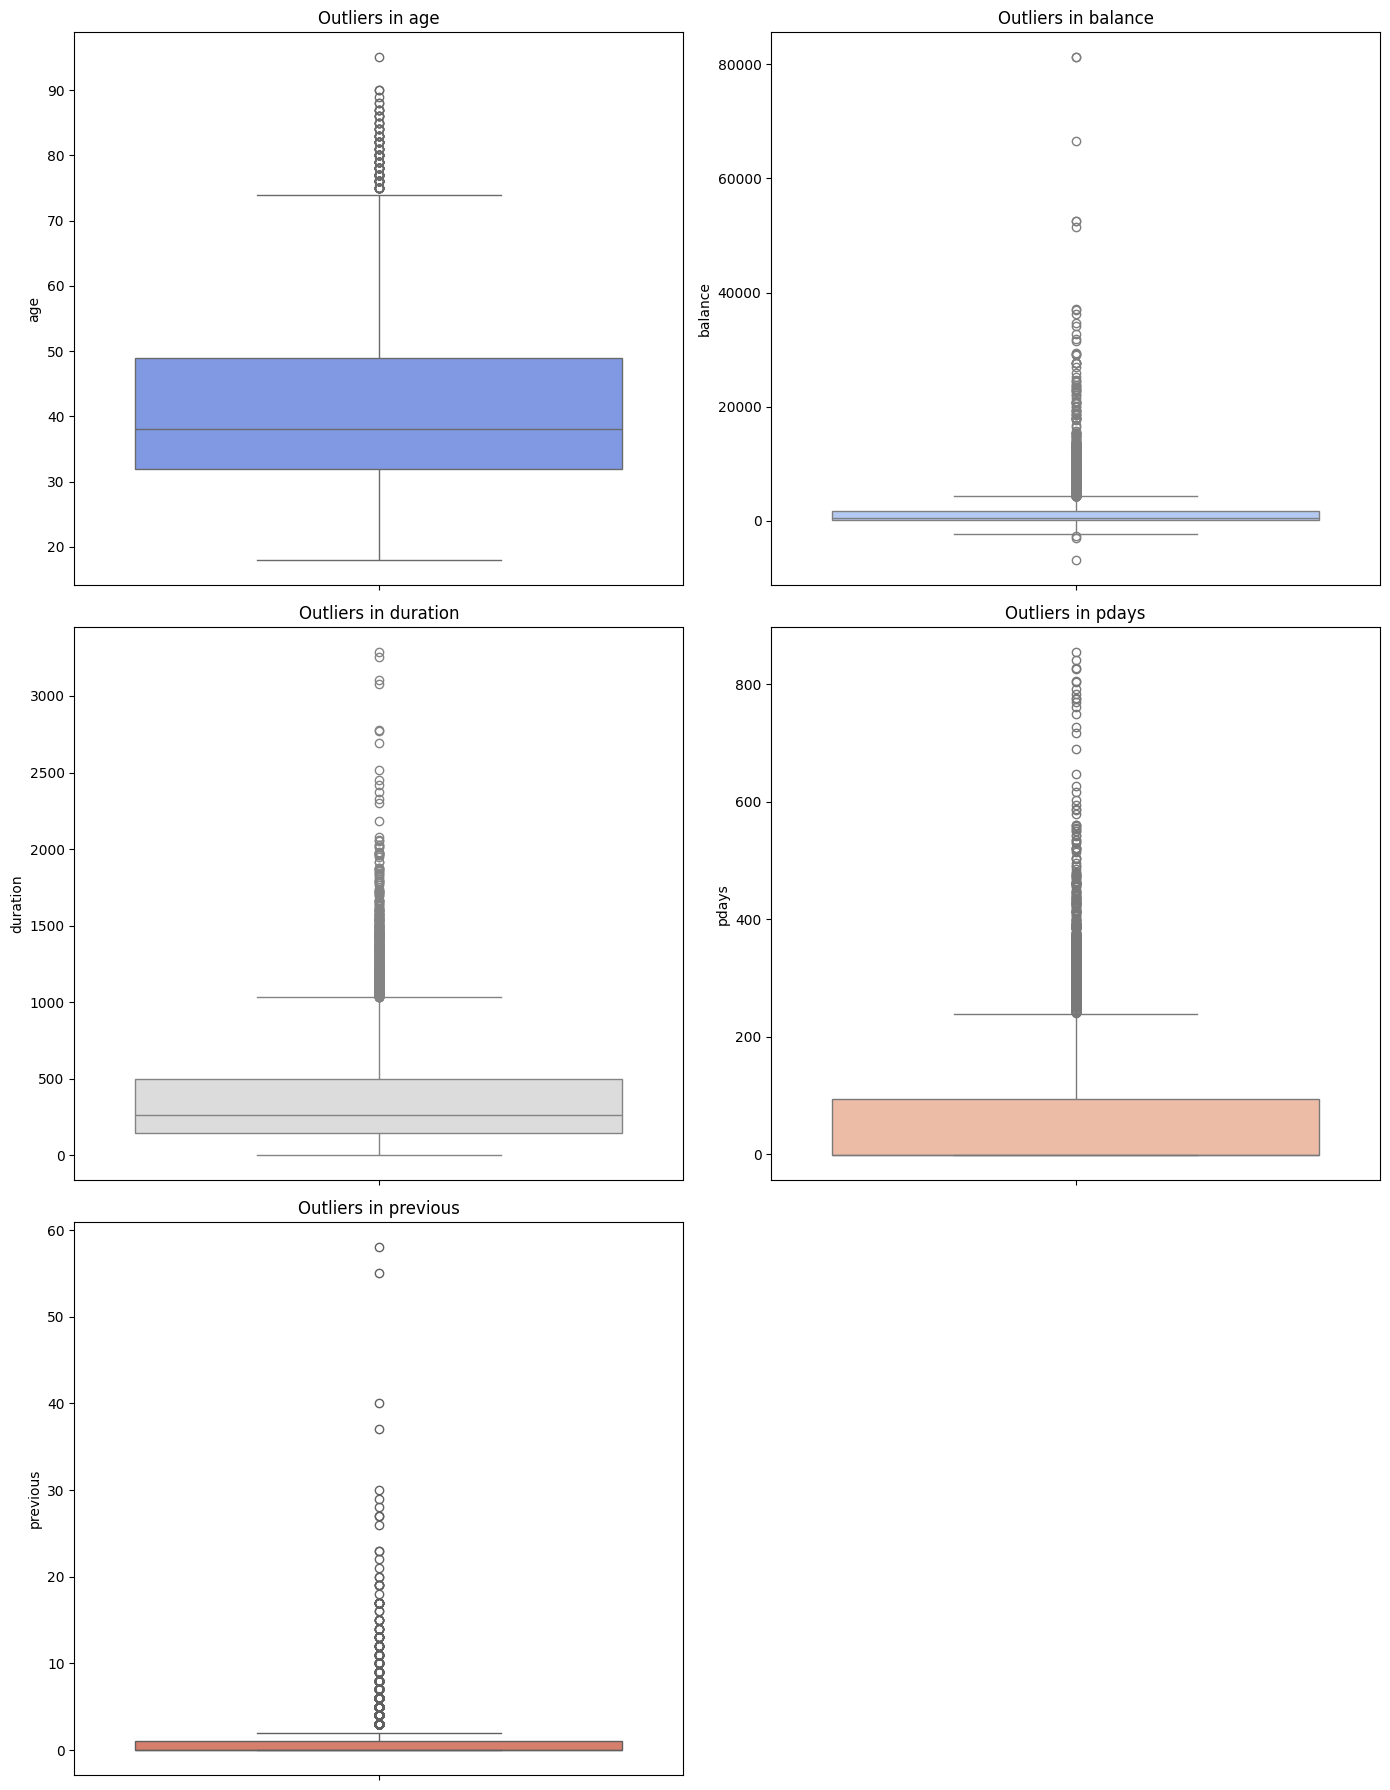

In [ ]:
import math


outliers_cols = outlier_cols_df
n_cols = 2
n_rows = math.ceil(len(outlier_cols_df) / n_cols)

palette = sns.color_palette('coolwarm', len(outlier_cols_df))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6*n_rows))
axes = axes.flatten()

for i, col in enumerate(outliers_cols):
    sns.boxplot(
        y=df[col],
        ax=axes[i],
        color=palette[i]
    )
    axes[i].set_title(f'Outliers in {col}')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers_df(df, outliers_cols , factor = 1.5):

  for col in outliers_cols:
    Q1 = df[outliers_cols].quantile(0.10)
    Q3 = df[outliers_cols].quantile(0.90)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    df = df[(df[col] >= lower_bound[col]) & (df[col] <= upper_bound[col])]

  return df

In [ ]:
df = remove_outliers_df(df, outlier_cols_df)

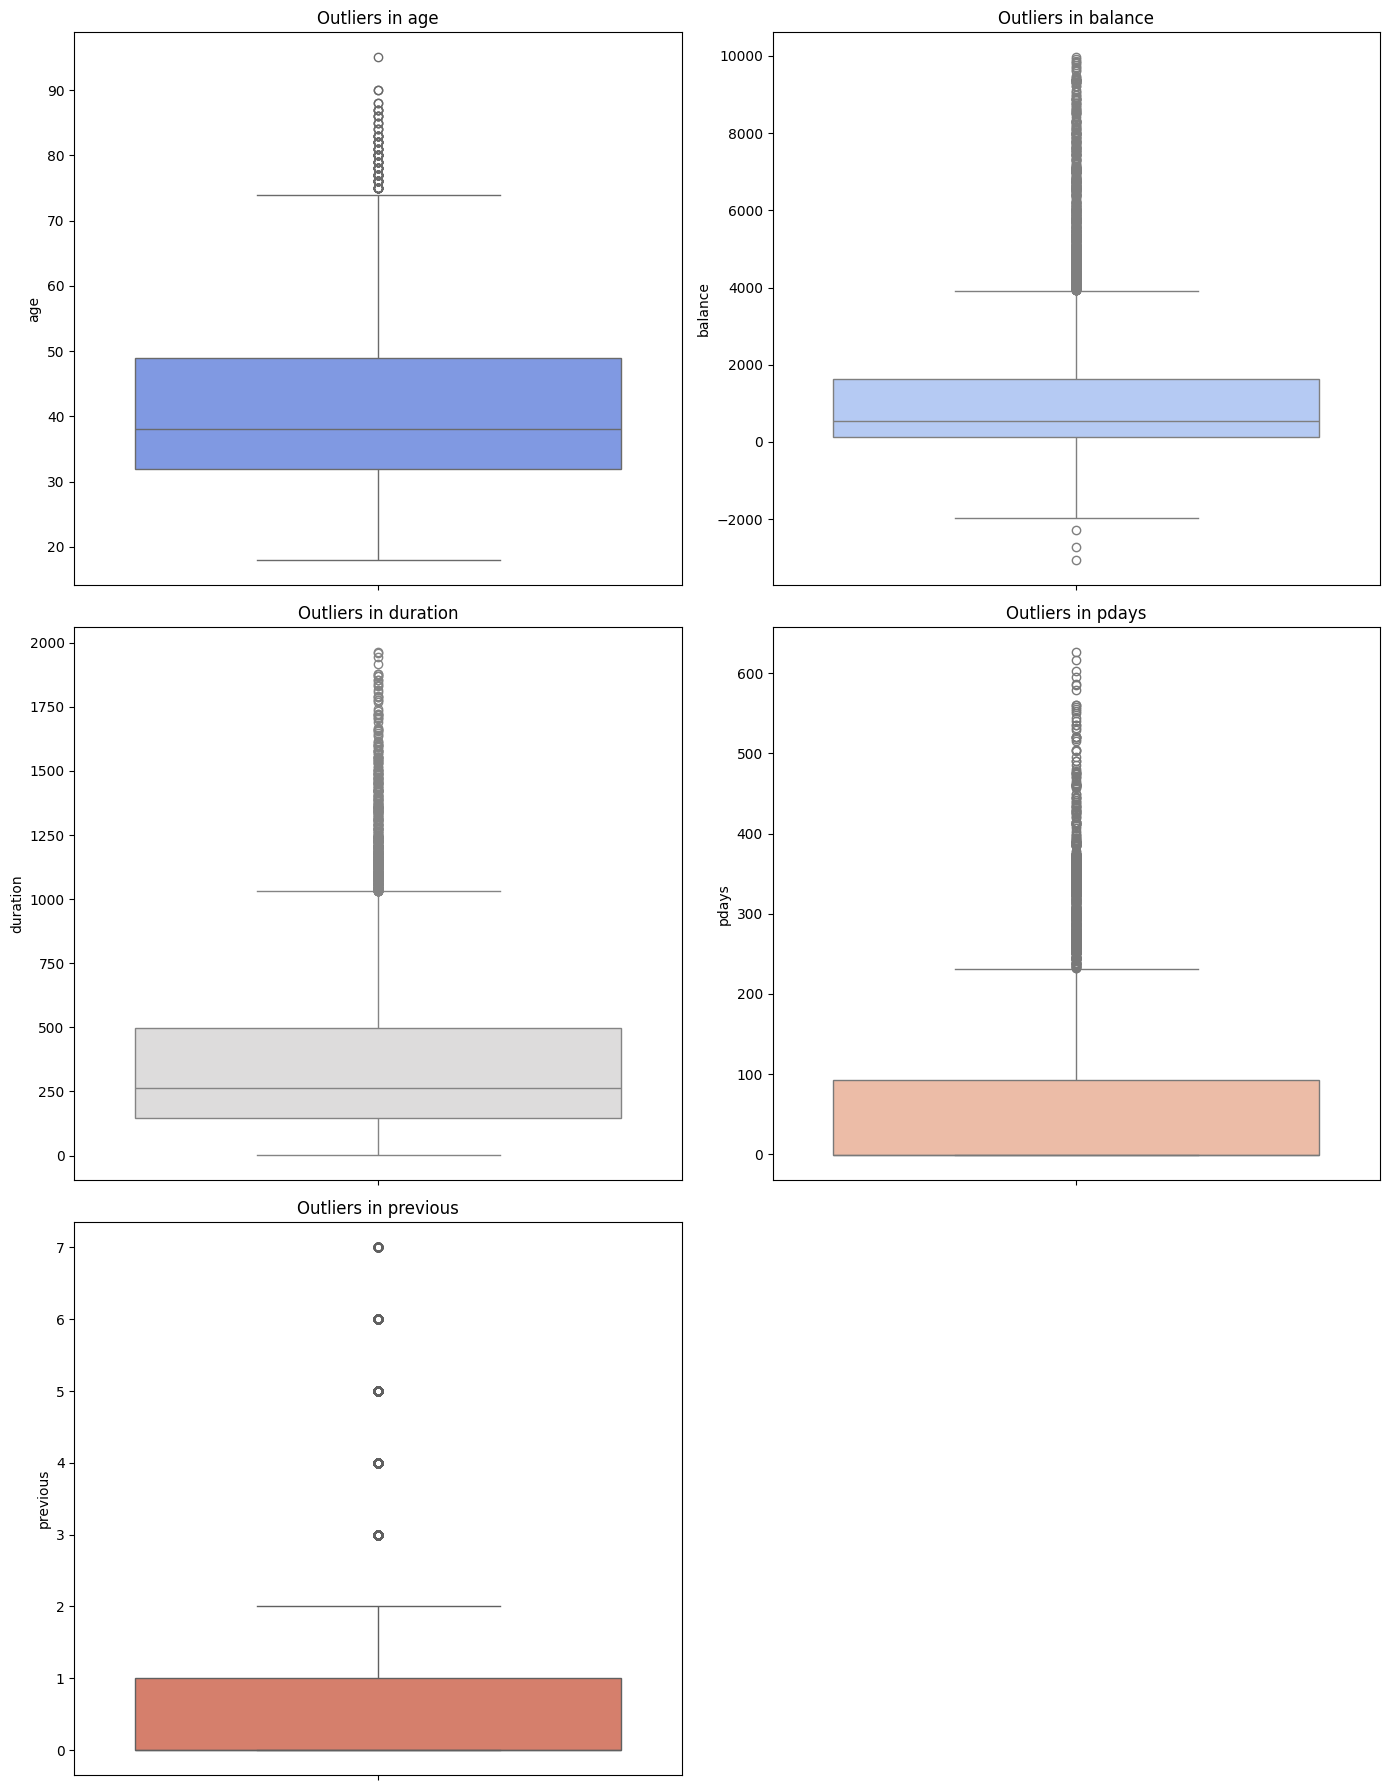

In [ ]:
import math


num_cols = outlier_cols_df
n_cols = 2
n_rows = math.ceil(len(outlier_cols_df) / n_cols)

palette = sns.color_palette('coolwarm', len(outlier_cols_df))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6*n_rows))
axes = axes.flatten()

for i, col in enumerate(outlier_cols_df):
    sns.boxplot(
        y=df[col],
        ax=axes[i],
        color=palette[i]
    )
    axes[i].set_title(f'Outliers in {col}')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
df.shape

(7952, 15)

In [ ]:
outlier_cols_df2 = ['age' , 'balance' , 'duration' , 'pdays' , 'previous']

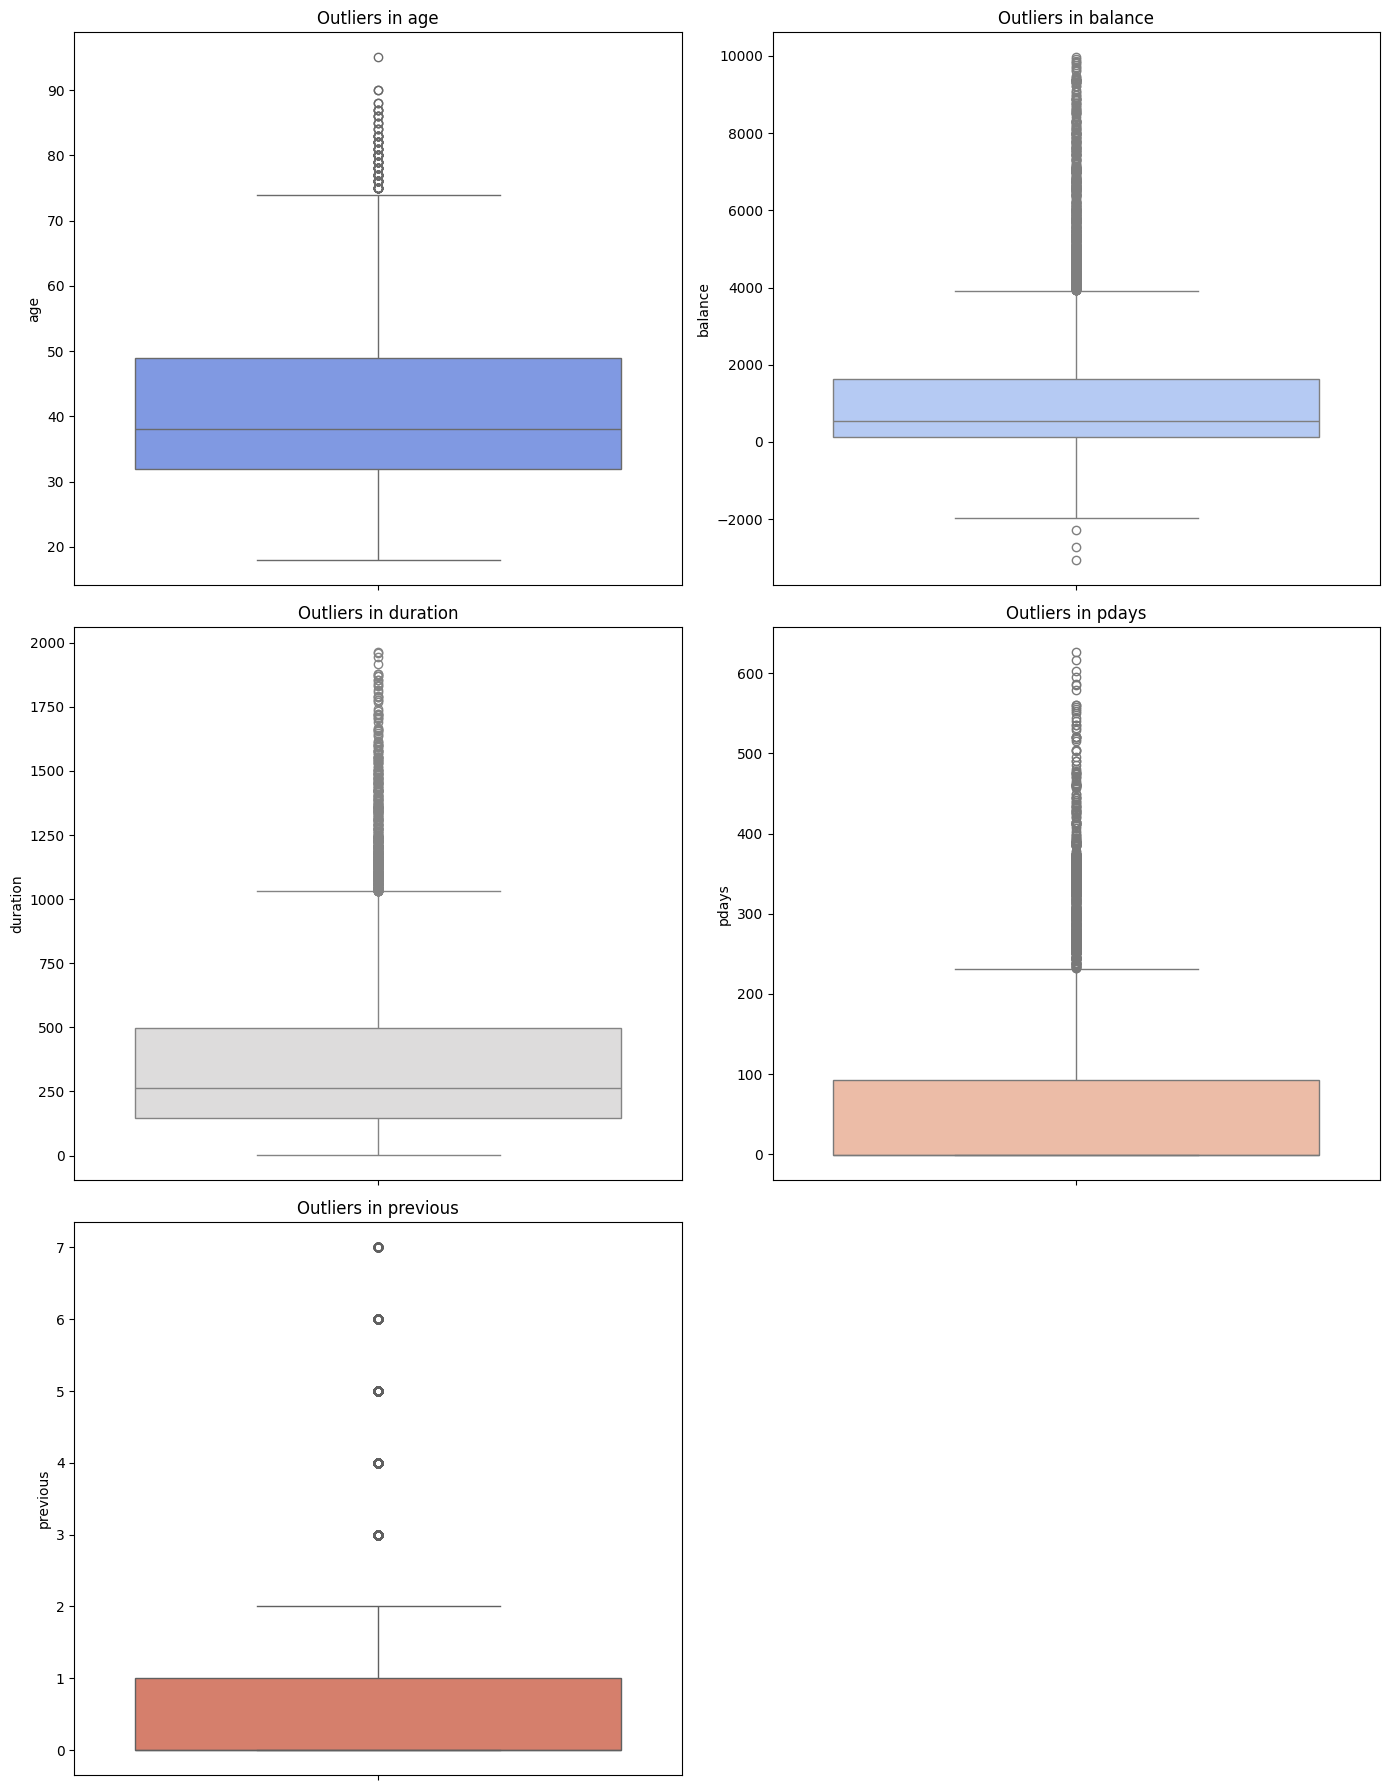

In [ ]:
import math


outliers_cols = outlier_cols_df2
n_cols = 2
n_rows = math.ceil(len(outlier_cols_df2) / n_cols)

palette = sns.color_palette('coolwarm', len(outlier_cols_df2))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6*n_rows))
axes = axes.flatten()

for i, col in enumerate(outliers_cols):
    sns.boxplot(
        y=df[col],
        ax=axes[i],
        color=palette[i]
    )
    axes[i].set_title(f'Outliers in {col}')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
def remove_outliers_df2(df2, outliers_cols_df2 , factor = 1.5):

  for col in outlier_cols_df2:
    Q1 = df[outlier_cols_df2].quantile(0.10)
    Q3 = df[outlier_cols_df2].quantile(0.90)
    IQR = Q3 - Q1

    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    df2 = df2[(df2[col] >= lower_bound[col]) & (df2[col] <= upper_bound[col])]

  return df2

In [ ]:
df2 = remove_outliers_df2(df2, outlier_cols_df2)

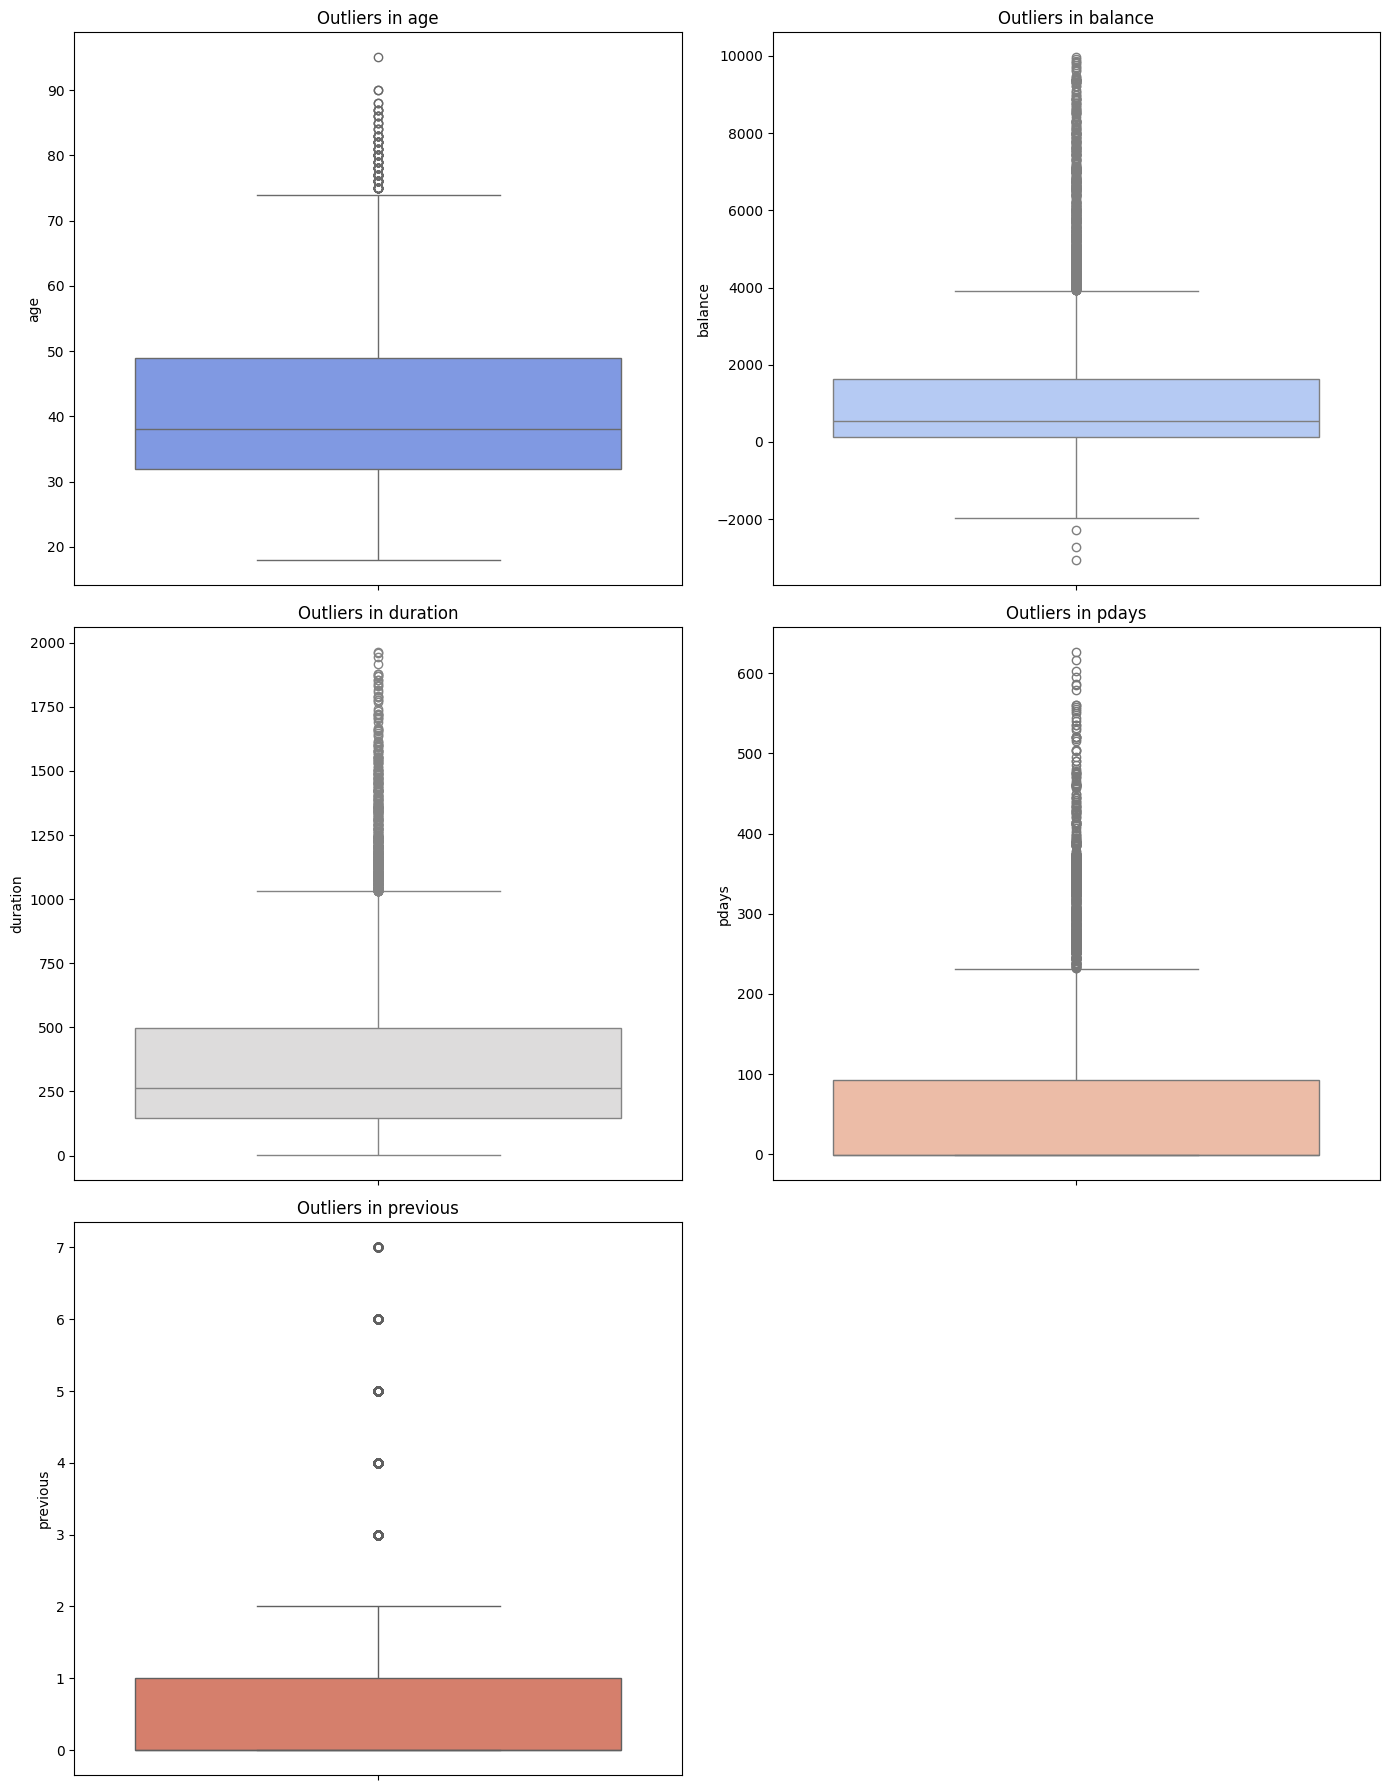

In [ ]:
import math


num_cols = outlier_cols_df2
n_cols = 2
n_rows = math.ceil(len(outlier_cols_df2) / n_cols)

palette = sns.color_palette('coolwarm', len(outlier_cols_df2))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6*n_rows))
axes = axes.flatten()

for i, col in enumerate(outlier_cols_df2):
    sns.boxplot(
        y=df[col],
        ax=axes[i],
        color=palette[i]
    )
    axes[i].set_title(f'Outliers in {col}')


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
df2.shape

(10578, 15)

**Encoding**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7952 entries, 367 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7952 non-null   int64 
 1   job        7952 non-null   object
 2   marital    7952 non-null   object
 3   education  7952 non-null   object
 4   default    7952 non-null   object
 5   balance    7952 non-null   int64 
 6   housing    7952 non-null   object
 7   loan       7952 non-null   object
 8   contact    7952 non-null   object
 9   day        7952 non-null   int64 
 10  duration   7952 non-null   int64 
 11  campaign   7952 non-null   int64 
 12  pdays      7952 non-null   int64 
 13  previous   7952 non-null   int64 
 14  deposit    7952 non-null   object
dtypes: int64(7), object(8)
memory usage: 994.0+ KB


In [ ]:
onehot_cols_df = ['job' , 'marital' , 'education' , 'contact']
la_cols_df = ['default' , 'housing' , 'loan' , 'deposit']

In [ ]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_array = ohe.fit_transform(df[onehot_cols_df])

df
df_ohe = pd.DataFrame(
    ohe_array,
    columns=ohe.get_feature_names_out(onehot_cols_df),
    index=df.index
)


df = pd.concat(
    [
        df.drop(onehot_cols_df, axis=1),
        df_ohe
    ],
    axis=1
)

In [ ]:
le = LabelEncoder()
df[la_cols_df] = df[la_cols_df].apply(le.fit_transform)

In [ ]:
cols = [col for col in df.columns if col != 'deposit'] + ['deposit']
df = df[cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7952 entries, 367 to 11161
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7952 non-null   int64  
 1   default              7952 non-null   int64  
 2   balance              7952 non-null   int64  
 3   housing              7952 non-null   int64  
 4   loan                 7952 non-null   int64  
 5   day                  7952 non-null   int64  
 6   duration             7952 non-null   int64  
 7   campaign             7952 non-null   int64  
 8   pdays                7952 non-null   int64  
 9   previous             7952 non-null   int64  
 10  job_admin.           7952 non-null   float64
 11  job_blue-collar      7952 non-null   float64
 12  job_entrepreneur     7952 non-null   float64
 13  job_housemaid        7952 non-null   float64
 14  job_management       7952 non-null   float64
 15  job_retired          7952 non-null   flo

In [ ]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,deposit
367,28,0,-127,1,0,4,1044,3,-1,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
368,55,0,49,1,0,7,494,4,-1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
369,51,0,216,0,0,7,615,2,-1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
370,39,0,506,1,0,7,718,2,-1,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
371,42,0,213,1,0,7,434,3,-1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10578 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10578 non-null  int64 
 1   job        10578 non-null  object
 2   marital    10578 non-null  object
 3   education  10578 non-null  object
 4   default    10578 non-null  object
 5   balance    10578 non-null  int64 
 6   housing    10578 non-null  object
 7   loan       10578 non-null  object
 8   contact    10578 non-null  object
 9   day        10578 non-null  int64 
 10  duration   10578 non-null  int64 
 11  campaign   10578 non-null  int64 
 12  pdays      10578 non-null  int64 
 13  previous   10578 non-null  int64 
 14  deposit    10578 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [ ]:
onehot_cols_df2 = ['job' , 'marital' , 'education' , 'contact']
la_cols_df2 = ['default' , 'housing' , 'loan' , 'deposit']

In [ ]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
ohe_array = ohe.fit_transform(df2[onehot_cols_df2])

df2
df_ohe2 = pd.DataFrame(
    ohe_array,
    columns=ohe.get_feature_names_out(onehot_cols_df2),
    index=df2.index
)


df2 = pd.concat(
    [
        df2.drop(onehot_cols_df2, axis=1),
        df_ohe2
    ],
    axis=1
)

In [ ]:
le = LabelEncoder()
df2[la_cols_df2] = df2[la_cols_df2].apply(le.fit_transform)

In [ ]:
cols = [col for col in df2.columns if col != 'deposit'] + ['deposit']
df2 = df2[cols]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10578 entries, 0 to 11161
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10578 non-null  int64  
 1   default              10578 non-null  int64  
 2   balance              10578 non-null  int64  
 3   housing              10578 non-null  int64  
 4   loan                 10578 non-null  int64  
 5   day                  10578 non-null  int64  
 6   duration             10578 non-null  int64  
 7   campaign             10578 non-null  int64  
 8   pdays                10578 non-null  int64  
 9   previous             10578 non-null  int64  
 10  job_admin.           10578 non-null  float64
 11  job_blue-collar      10578 non-null  float64
 12  job_entrepreneur     10578 non-null  float64
 13  job_housemaid        10578 non-null  float64
 14  job_management       10578 non-null  float64
 15  job_retired          10578 non-null  floa

In [ ]:
df2.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,deposit
0,59,0,2343,1,0,5,1042,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,56,0,45,0,0,5,1467,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,41,0,1270,1,0,5,1389,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,55,0,2476,1,0,5,579,1,-1,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,54,0,184,0,0,5,673,2,-1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1


**Scaling**

In [ ]:
scaled_cols_df = ['age' , 'balance' , 'day' ,'duration' , 'campaign' , 'pdays' , 'previous']
scaled_cols_df2 = ['age' , 'balance' , 'day' ,'duration' , 'campaign' , 'pdays' , 'previous']

In [ ]:
scaler = MinMaxScaler()
df[scaled_cols_df] = scaler.fit_transform(df[scaled_cols_df])
df2[scaled_cols_df2] = scaler.fit_transform(df2[scaled_cols_df2])

In [ ]:
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,deposit
367,0.129870,0,0.225115,1,0,0.1,0.531633,0.047619,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
368,0.480519,0,0.238633,1,0,0.2,0.251020,0.071429,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
369,0.428571,0,0.251459,0,0,0.2,0.312755,0.023810,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
370,0.272727,0,0.273733,1,0,0.2,0.365306,0.023810,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
371,0.311688,0,0.251229,1,0,0.2,0.220408,0.047619,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


In [ ]:
df2.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,contact_cellular,contact_telephone,deposit
0,0.532468,0,0.457441,1,0,0.133333,0.534979,0.00000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,0.493506,0,0.262810,0,0,0.133333,0.753601,0.00000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
2,0.298701,0,0.366562,1,0,0.133333,0.713477,0.00000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
3,0.480519,0,0.468705,1,0,0.133333,0.296811,0.00000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,0.467532,0,0.274583,0,0,0.133333,0.345165,0.02381,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1


**Data Spiliting**

In [ ]:
x_df = df.drop('deposit' , axis=1)
y_df = df['deposit']

x_df2 = df2.drop('deposit' , axis=1)
y_df2 = df2['deposit']


x_df_train , x_df_test , y_df_train , y_df_test = train_test_split(x_df , y_df , random_state=42)
x_df2_train , x_df2_test , y_df2_train , y_df2_test = train_test_split(x_df2 , y_df2 , random_state=42)

**Modleing**

In [ ]:
Models_df = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'DT' : DecisionTreeClassifier(),
    'RF' : RandomForestClassifier(),
    'GB' : GradientBoostingClassifier(),
    'SVM' : SVC(),
}

In [ ]:
for model_name, model in Models_df.items():

    if model_name == 'Logistic Regression':
        model.fit(x_df_train, y_df_train)

        LR_train_score = model.score(x_df_train, y_df_train)
        LR_test_score  = model.score(x_df_test, y_df_test)

        print(f'{model_name} Train Score : {LR_train_score:.4f}')
        print(f'{model_name} Test  Score : {LR_test_score:.4f}')

    elif model_name == 'KNN':
        model.fit(x_df_train, y_df_train)

        KNN_train_score = model.score(x_df_train, y_df_train)
        KNN_test_score  = model.score(x_df_test, y_df_test)

        print(f'{model_name} Train Score : {KNN_train_score:.4f}')
        print(f'{model_name} Test  Score : {KNN_test_score:.4f}')

    elif model_name == 'DT':
        model.fit(x_df_train, y_df_train)

        DT_train_score = model.score(x_df_train, y_df_train)
        DT_test_score  = model.score(x_df_test, y_df_test)

        print(f'{model_name} Train Score : {DT_train_score:.4f}')
        print(f'{model_name} Test  Score : {DT_test_score:.4f}')

    elif model_name == 'RF':
        model.fit(x_df_train, y_df_train)

        RF_train_score = model.score(x_df_train, y_df_train)
        RF_test_score  = model.score(x_df_test, y_df_test)

        print(f'{model_name} Train Score : {RF_train_score:.4f}')
        print(f'{model_name} Test  Score : {RF_test_score:.4f}')


    elif model_name == 'GB':
        model.fit(x_df_train, y_df_train)

        GB_train_score = model.score(x_df_train, y_df_train)
        GB_test_score  = model.score(x_df_test, y_df_test)

        print(f'{model_name} Train Score : {GB_train_score:.4f}')
        print(f'{model_name} Test  Score : {GB_test_score:.4f}')

    else:
        model.fit(x_df_train, y_df_train)

        SVM_train_score = model.score(x_df_train, y_df_train)
        SVM_test_score  = model.score(x_df_test, y_df_test)

        print(f'{model_name} Train Score : {SVM_train_score:.4f}')
        print(f'{model_name} Test  Score : {SVM_test_score:.4f}')

    print('-' * 40)


Logistic Regression Train Score : 0.7805
Logistic Regression Test  Score : 0.7817
----------------------------------------
KNN Train Score : 0.7964
KNN Test  Score : 0.7017
----------------------------------------
DT Train Score : 1.0000
DT Test  Score : 0.7334
----------------------------------------
RF Train Score : 1.0000
RF Test  Score : 0.8089
----------------------------------------
GB Train Score : 0.8256
GB Test  Score : 0.8164
----------------------------------------
SVM Train Score : 0.7961
SVM Test  Score : 0.7857
----------------------------------------


In [ ]:
Models_df2 = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'DT' : DecisionTreeClassifier(),
    'RF' : RandomForestClassifier(),
    'GB' : GradientBoostingClassifier(),
    'SVM' : SVC(),
}

In [ ]:
for model_name, model in Models_df2.items():

    if model_name == 'Logistic Regression':
        model.fit(x_df2_train, y_df2_train)

        LR_train_score = model.score(x_df2_train, y_df2_train)
        LR_test_score  = model.score(x_df2_test, y_df2_test)

        print(f'{model_name} Train Score : {LR_train_score:.4f}')
        print(f'{model_name} Test  Score : {LR_test_score:.4f}')

    elif model_name == 'KNN':
        model.fit(x_df_train, y_df_train)

        KNN_train_score = model.score(x_df2_train, y_df2_train)
        KNN_test_score  = model.score(x_df2_test, y_df2_test)

        print(f'{model_name} Train Score : {KNN_train_score:.4f}')
        print(f'{model_name} Test  Score : {KNN_test_score:.4f}')

    elif model_name == 'DT':
        model.fit(x_df2_train, y_df2_train)

        DT_train_score = model.score(x_df2_train, y_df2_train)
        DT_test_score  = model.score(x_df2_test, y_df2_test)

        print(f'{model_name} Train Score : {DT_train_score:.4f}')
        print(f'{model_name} Test  Score : {DT_test_score:.4f}')

    elif model_name == 'RF':
        model.fit(x_df2_train, y_df2_train)

        RF_train_score = model.score(x_df_train, y_df_train)
        RF_test_score  = model.score(x_df_test, y_df_test)

        print(f'{model_name} Train Score : {RF_train_score:.4f}')
        print(f'{model_name} Test  Score : {RF_test_score:.4f}')

    elif model_name == 'GB':
        model.fit(x_df2_train, y_df2_train)

        GB_train_score = model.score(x_df2_train, y_df2_train)
        GB_test_score  = model.score(x_df2_test, y_df2_test)

        print(f'{model_name} Train Score : {GB_train_score:.4f}')
        print(f'{model_name} Test  Score : {GB_test_score:.4f}')

    else:
        model.fit(x_df2_train, y_df2_train)

        SVM_train_score = model.score(x_df2_train, y_df2_train)
        SVM_test_score  = model.score(x_df2_test, y_df2_test)

        print(f'{model_name} Train Score : {SVM_train_score:.4f}')
        print(f'{model_name} Test  Score : {SVM_test_score:.4f}')

    print('-' * 40)


Logistic Regression Train Score : 0.7829
Logistic Regression Test  Score : 0.8057
----------------------------------------
KNN Train Score : 0.7605
KNN Test  Score : 0.7750
----------------------------------------
DT Train Score : 1.0000
DT Test  Score : 0.7403
----------------------------------------
RF Train Score : 0.9076
RF Test  Score : 0.9125
----------------------------------------
GB Train Score : 0.8264
GB Test  Score : 0.8310
----------------------------------------
SVM Train Score : 0.8046
SVM Test  Score : 0.8049
----------------------------------------


In [ ]:
models = ['Logistic Regression', 'KNN', 'DT', 'RF', 'GB', 'SVM']

train_scores_1 = [0.7885, 0.7964, 1.0000, 1.0000, 0.8256, 0.7961]
test_scores_1  = [0.7817, 0.7817, 0.7279, 0.8094, 0.8164, 0.7857]

train_scores_2 = [0.7829, 0.7605, 1.0000, 0.9046,0.8264 , 0.8046]
test_scores_2  = [0.8057, 0.7750, 0.7448, 0.9175,0.8310 , 0.8049]

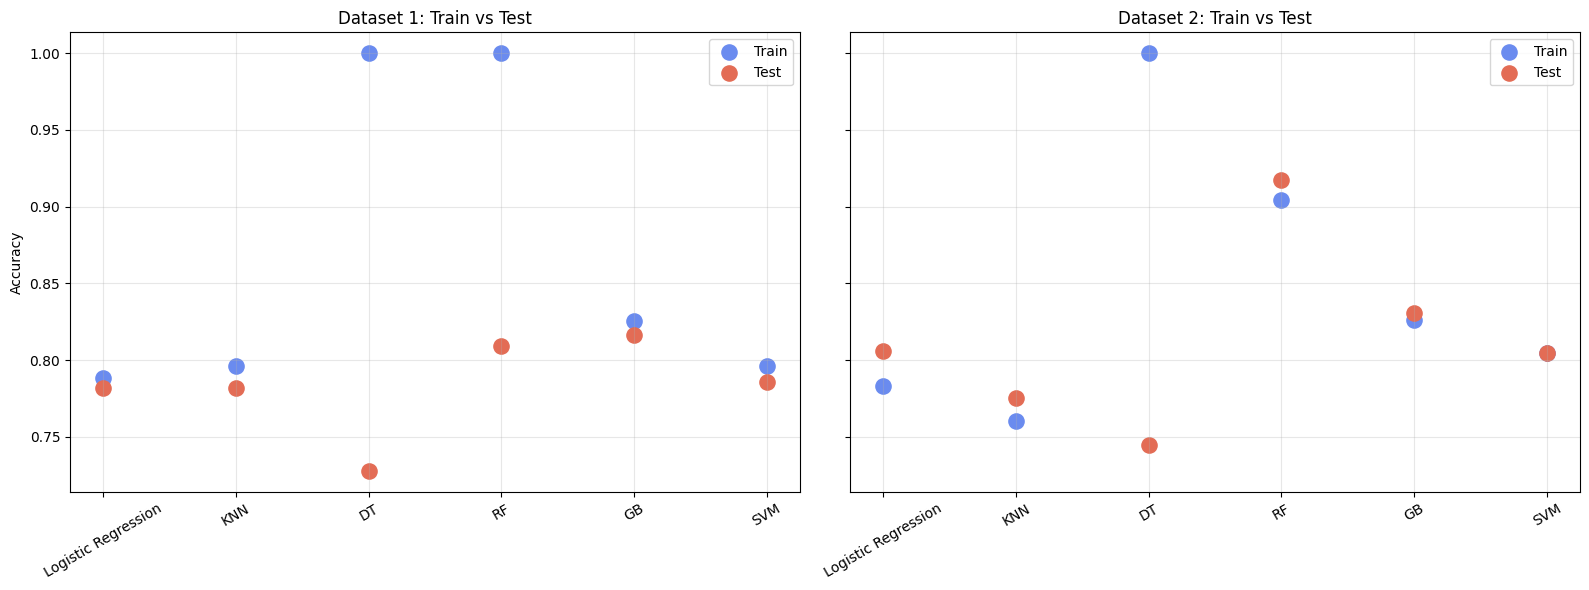

In [ ]:
x = np.arange(len(models))

# ألوان coolwarm
train_color = plt.cm.coolwarm(0.15)
test_color  = plt.cm.coolwarm(0.85)

fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# ===== Dataset 1 =====
axes[0].scatter(x, train_scores_1,
                color=train_color, s=120, label='Train')
axes[0].scatter(x, test_scores_1,
                color=test_color, s=120, label='Test')

axes[0].set_title('Dataset 1: Train vs Test')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=30)
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# ===== Dataset 2 =====
axes[1].scatter(x, train_scores_2,
                color=train_color, s=120, label='Train')
axes[1].scatter(x, test_scores_2,
                color=test_color, s=120, label='Test')

axes[1].set_title('Dataset 2: Train vs Test')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=30)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Fine Tuneing**



*   Logistic Regression (df , df2)
*   KNN Classifier (df , df2)
*   Decision Tree (df , df2)
*   Random Forest (df , df2)
*   Gradianet Boost (df , df2)
*   SVC (df , df2)



**Logistic Regression (df)**

In [ ]:
LR_df = LogisticRegression(max_iter=1000)

LR_df_param = {
    'C': [0.01, 0.1, 1, 10, 50],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

clf_df = GridSearchCV(
    LR_df,
    LR_df_param,
    cv=5,
    scoring='accuracy'
)

clf_df.fit(x_df_train, y_df_train)

print("Best Parameters:", clf_df.best_params_)
print("Best CV Score:", clf_df.best_score_)


best_LR_df = clf_df.best_estimator_

print("Train Score After Fine Tuning:", best_LR_df.score(x_df_train, y_df_train))
print("Test Score After Fine Tuning:", best_LR_df.score(x_df_test, y_df_test))

Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
Best CV Score: 0.7780014289170047
Train Score After Fine Tuning: 0.7801810865191147
Test Score After Fine Tuning: 0.7847082494969819


**Logistic Regression (df2)**

In [ ]:
LR_df2 = LogisticRegression(max_iter=1000)

LR_df2_param = {
    'C': [0.01, 0.1, 1, 10, 50],
    #'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}

clf_df2 = GridSearchCV(
    LR_df2,
    LR_df2_param,
    cv=5,
    scoring='accuracy'
)

clf_df2.fit(x_df2_train, y_df2_train)

print("Best Parameters:", clf_df2.best_params_)
print("Best CV Score:", clf_df2.best_score_)


best_LR_df2 = clf_df2.best_estimator_

print("Train Score After Fine Tuning:", best_LR_df2.score(x_df2_train, y_df2_train))
print("Test Score After Fine Tuning:", best_LR_df2.score(x_df2_test, y_df2_test))

Best Parameters: {'C': 1, 'class_weight': 'balanced', 'solver': 'saga'}
Best CV Score: 0.7863339507394174
Train Score After Fine Tuning: 0.7884785075003151
Test Score After Fine Tuning: 0.8079395085066162


**KNN Classifier (df)**

In [ ]:
knn_df = KNeighborsClassifier()

knn_df_param = {
    'n_neighbors': [3,5,7,9,11] ,
    'p' : [1,2]
}

clf_df = GridSearchCV(  knn_df ,
  knn_df_param ,
  cv=5 ,
  scoring='accuracy'
)

clf_df.fit(x_df_train , y_df_train)

print("Best Parameters:", clf_df.best_params_)
print("Best CV Score:", clf_df.best_score_)

best_knn_df = clf_df.best_estimator_

print("Train Score After Fine Tuning:", best_knn_df.score(x_df_train, y_df_train))
print("Test Score After Fine Tuning:", best_knn_df.score(x_df_test, y_df_test))

Best Parameters: {'n_neighbors': 7, 'p': 1}
Best CV Score: 0.6882961008567876
Train Score After Fine Tuning: 0.7825285043594903
Test Score After Fine Tuning: 0.6991951710261569


**KNN Classifier (df2)**

In [ ]:
knn_df2 = KNeighborsClassifier()

knn_df2_param = {
    'n_neighbors': [3,5,7,9,11] ,
    'p' : [1,2]
}

clf_df2 = GridSearchCV(  knn_df2 ,
  knn_df2_param ,
  cv=5 ,
  scoring='accuracy'
)

clf_df2.fit(x_df2_train , y_df2_train)

print("Best Parameters:", clf_df2.best_params_)
print("Best CV Score:", clf_df2.best_score_)

best_knn_df2 = clf_df2.best_estimator_

print("Train Score After Fine Tuning:", best_knn_df2.score(x_df2_train, y_df2_train))
print("Test Score After Fine Tuning:", best_knn_df2.score(x_df2_test, y_df2_test))

Best Parameters: {'n_neighbors': 9, 'p': 1}
Best CV Score: 0.7182648107932437
Train Score After Fine Tuning: 0.7758729358376403
Test Score After Fine Tuning: 0.7164461247637051


**Decision Tree (df)**

In [ ]:
DT_df = DecisionTreeClassifier()

clf_df_param = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
     'splitter': ['best', 'random'], 'max_depth': [2, 4, 8, 10, 20, 30], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 3, 4, 5],
        'class_weight': ['balanced' , None]
}

clf_df = GridSearchCV(
    DT_df,
    clf_df_param,
    cv=5,
    scoring='accuracy'
)

clf_df.fit(x_df_train, y_df_train)

print("Best Parameters:", clf_df.best_params_)
print("Best CV Score:", clf_df.best_score_)

best_DT_df = clf_df.best_estimator_

print("Train Score After Fine Tuning:", best_DT_df.score(x_df_train, y_df_train))
print("Test Score After Fine Tuning:", best_DT_df.score(x_df_test, y_df_test))

Best Parameters: {'class_weight': None, 'criterion': 'log_loss', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}
Best CV Score: 0.7706212694858712
Train Score After Fine Tuning: 0.818075117370892
Test Score After Fine Tuning: 0.7771629778672032


**Decision Tree (df2)**

In [ ]:
DT_df2 = DecisionTreeClassifier()

clf_df2_param = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
     'splitter': ['best', 'random'], 'max_depth': [2, 4, 8, 10, 20, 30], 'min_samples_split': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 3, 4, 5],
        'class_weight': ['balanced' , None]

}

clf_df2 = GridSearchCV(
    DT_df2,
    clf_df2_param,
    cv=5,
    scoring='accuracy'
)

clf_df2.fit(x_df2_train, y_df2_train)

print("Best Parameters:", clf_df2.best_params_)
print("Best CV Score:", clf_df2.best_score_)

best_DT_df2 = clf_df2.best_estimator_

print("Train Score After Fine Tuning:", best_DT_df2.score(x_df2_train, y_df2_train))
print("Test Score After Fine Tuning:", best_DT_df2.score(x_df2_test, y_df2_test))

Best Parameters: {'class_weight': None, 'criterion': 'log_loss', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'best'}
Best CV Score: 0.7901149869168711
Train Score After Fine Tuning: 0.8212529938232699
Test Score After Fine Tuning: 0.8056710775047259


**Random Forest (df)**

In [ ]:
RF_df = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

RF_df_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced' , None]

}

clf_df = RandomizedSearchCV(
    RF_df,
    RF_df_param,
    n_iter=40,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

clf_df.fit(x_df_train, y_df_train)

print("Best Parameters:", clf_df.best_params_)
print("Best CV Score:", clf_df.best_score_)

best_RF_df = clf_df.best_estimator_

print("Train Score After Fine Tuning:", best_RF_df.score(x_df_train, y_df_train))
print("Test Score After Fine Tuning:", best_RF_df.score(x_df_test, y_df_test))

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}
Best CV Score: 0.8006371562709592
Train Score After Fine Tuning: 0.9481891348088531
Test Score After Fine Tuning: 0.8053319919517102


**Random Forest (df2)**

In [ ]:
RF_df2 = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

RF_df2_param = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced' , None]

}

clf_df2 = RandomizedSearchCV(
    RF_df2,
    RF_df2_param,
    n_iter=40,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

clf_df2.fit(x_df2_train, y_df2_train)

print("Best Parameters:", clf_df2.best_params_)
print("Best CV Score:", clf_df2.best_score_)

best_RF_df2 = clf_df2.best_estimator_

print("Train Score After Fine Tuning:", best_RF_df2.score(x_df2_train, y_df2_train))
print("Test Score After Fine Tuning:", best_RF_df2.score(x_df2_test, y_df2_test))

Fitting 3 folds for each of 40 candidates, totalling 120 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'gini'}
Best CV Score: 0.8119244199514398
Train Score After Fine Tuning: 0.8787344006050675
Test Score After Fine Tuning: 0.8272211720226843


**Gradianet Boost(df)**

In [ ]:
GB_df = GradientBoostingClassifier(
    random_state=42
)

GB_df_param = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', None]

}

clf_df = RandomizedSearchCV(
    GB_df,
    GB_df_param,
    n_iter=30,
    cv=3,
    scoring='accuracy',
    random_state=42,
    verbose=2
)

clf_df.fit(x_df_train, y_df_train)

print("Best Parameters:", clf_df.best_params_)
print("Best CV Score:", clf_df.best_score_)

best_GB_df = clf_df.best_estimator_

print("Train Score After Fine Tuning:", best_GB_df.score(x_df_train, y_df_train))
print("Test Score After Fine Tuning:", best_GB_df.score(x_df_test, y_df_test))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.3s
[CV] END learning_rate=0.05, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END learning_rate=0.05, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END learning_rate=0.05, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10,

**Gradianet Boost(df2)**

In [ ]:
GB_df2 = GradientBoostingClassifier(
    random_state=42
)

GB_df2_param = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', None]
}

clf_df2 = RandomizedSearchCV(
    GB_df2,
    GB_df2_param,
    n_iter=30,
    cv=3,
    scoring='accuracy',
    random_state=42,
    verbose=2
)

clf_df2.fit(x_df2_train, y_df2_train)

print("Best Parameters:", clf_df2.best_params_)
print("Best CV Score:", clf_df2.best_score_)

best_GB_df2 = clf_df2.best_estimator_

print("Train Score After Fine Tuning:", best_GB_df2.score(x_df2_train, y_df2_train))
print("Test Score After Fine Tuning:", best_GB_df2.score(x_df2_test, y_df2_test))

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.2s
[CV] END learning_rate=0.05, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   3.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=None, min_samples_leaf=4, min_samples_split=10,

**SVC (df)**

In [ ]:
svm_df = SVC()

svm_df_param = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10],
        'class_weight': [None, 'balanced']
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10],
        'class_weight': [None, 'balanced']
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1],
        'degree': [2, 3],
        'class_weight': [None, 'balanced']
    }
]


clf_df = GridSearchCV(
    svm_df,
    svm_df_param,
    cv=5,
    scoring='accuracy'
)

clf_df.fit(x_df_train, y_df_train)

print("Best Parameters:", clf_df.best_params_)
print("Best CV Score:", clf_df.best_score_)

best_svm_df = clf_df.best_estimator_

print("Train Score After Fine Tuning:", best_svm_df.score(x_df_train, y_df_train))
print("Test Score After Fine Tuning:", best_svm_df.score(x_df_test, y_df_test))


Best Parameters: {'C': 10, 'class_weight': None, 'kernel': 'linear'}
Best CV Score: 0.7796787187002482
Train Score After Fine Tuning: 0.7818578135479544
Test Score After Fine Tuning: 0.7847082494969819


**SVC (df2)**

In [ ]:
svm_df2 = SVC()

svm_df2_param = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10],
        'class_weight': [None, 'balanced']
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10],
        'class_weight': [None, 'balanced']
    },
    {
        'kernel': ['poly'],
        'C': [0.1, 1],
        'degree': [2, 3],
        'class_weight': [None, 'balanced']
    }
]

clf_df2= GridSearchCV(
    svm_df2,
    svm_df2_param,
    cv=5,
    scoring='accuracy'
)

clf_df2.fit(x_df2_train, y_df2_train)

print("Best Parameters:", clf_df2.best_params_)
print("Best CV Score:", clf_df2.best_score_)

best_svm_df2 = clf_df2.best_estimator_

print("Train Score After Fine Tuning:", best_svm_df2.score(x_df2_train, y_df2_train))
print("Test Score After Fine Tuning:", best_svm_df2.score(x_df2_test, y_df2_test))


Best Parameters: {'C': 1, 'class_weight': 'balanced', 'degree': 2, 'kernel': 'poly'}
Best CV Score: 0.7904932971312469
Train Score After Fine Tuning: 0.8010840791629901
Test Score After Fine Tuning: 0.8075614366729679


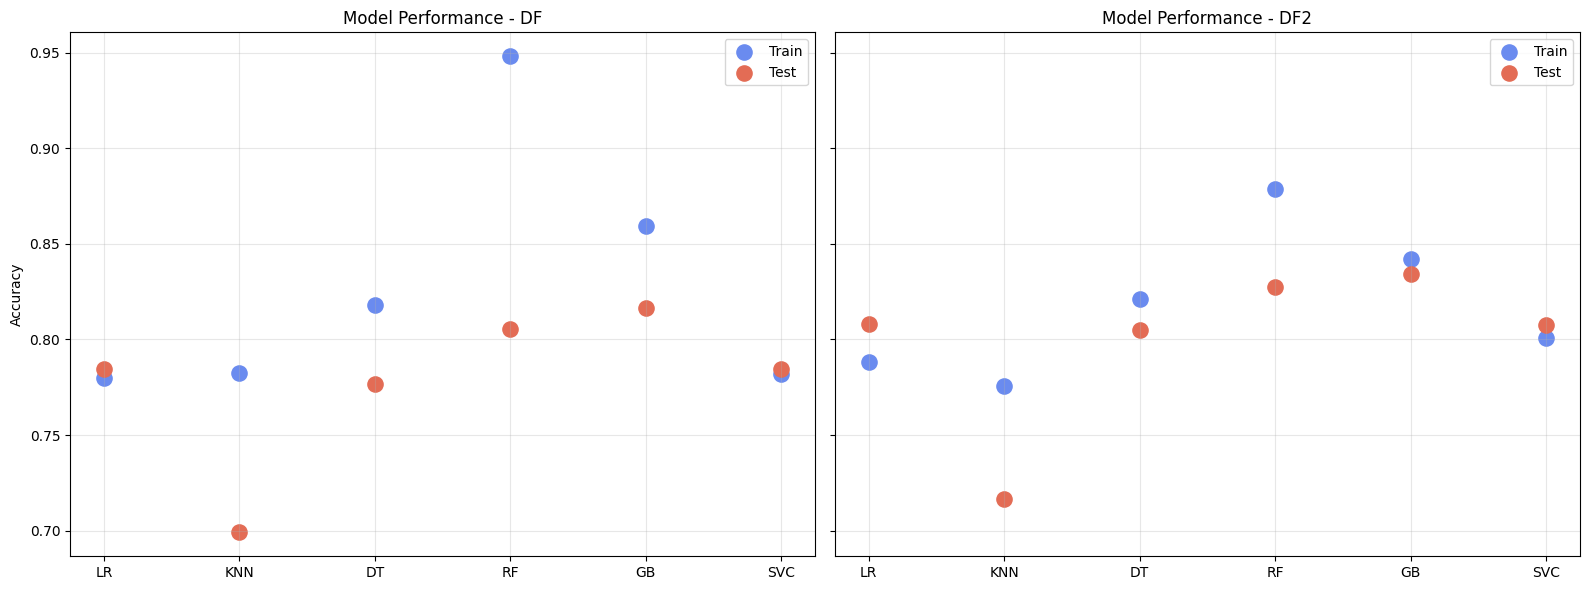

In [ ]:
models = ['LR', 'KNN', 'DT', 'RF', 'GB', 'SVC']
x = np.arange(len(models))

# ===============================
# Scores
# ===============================
train_df  = [0.7801, 0.7825, 0.8179, 0.9481, 0.8591, 0.7818]
test_df   = [0.7847, 0.6991, 0.7766, 0.8053, 0.8163, 0.7847]

train_df2 = [0.7884, 0.7758, 0.8212, 0.8787, 0.8421, 0.8010]
test_df2  = [0.8079, 0.7164, 0.8049, 0.8272, 0.8344, 0.8075]

# ===============================
# Colors from coolwarm
# ===============================
train_color = plt.cm.coolwarm(0.15)
test_color  = plt.cm.coolwarm(0.85)

# ===============================
# Plot
# ===============================
fig, axes = plt.subplots(1, 2, figsize=(16,6), sharey=True)

# ---------- DF ----------
axes[0].scatter(x, train_df, s=120, color=train_color, label='Train')
axes[0].scatter(x, test_df,  s=120, color=test_color,  label='Test')

axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_title('Model Performance - DF')
axes[0].set_ylabel('Accuracy')
axes[0].grid(alpha=0.3)
axes[0].legend()

# ---------- DF2 ----------
axes[1].scatter(x, train_df2, s=120, color=train_color, label='Train')
axes[1].scatter(x, test_df2,  s=120, color=test_color,  label='Test')

axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_title('Model Performance - DF2')
axes[1].grid(alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.show()

**Confusion Matrix For GB**

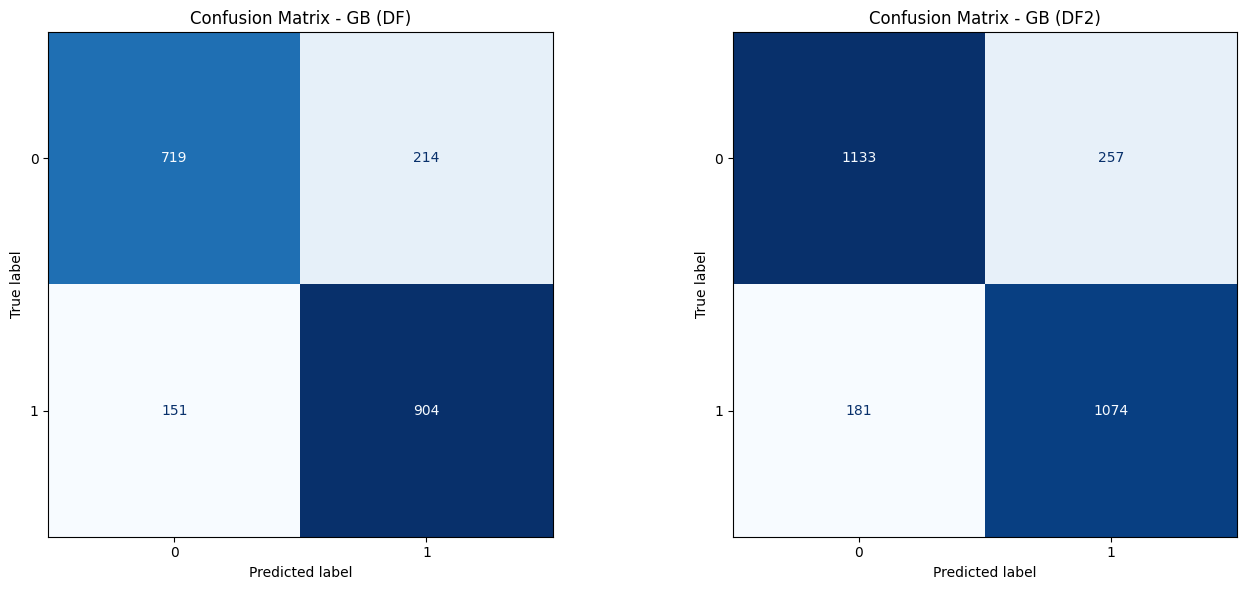

In [ ]:
y_df_pred  = best_GB_df.predict(x_df_test)
y_df2_pred = best_GB_df2.predict(x_df2_test)

# Confusion Matrices
cm_df  = confusion_matrix(y_df_test,  y_df_pred)
cm_df2 = confusion_matrix(y_df2_test, y_df2_pred)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14,6))

disp_df = ConfusionMatrixDisplay(cm_df)
disp_df.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Confusion Matrix - GB (DF)')

disp_df2 = ConfusionMatrixDisplay(cm_df2)
disp_df2.plot(ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title('Confusion Matrix - GB (DF2)')

plt.tight_layout()
plt.show()